In [4]:
#May 11

import ares
import numpy as np
import matplotlib.pyplot as pl

### First a linear relation of HMF to LF
- assuming 1 halo = 1 galaxy

In [9]:
pars = \
{
 'pop_sfr_model': 'sfe-func',
 'pop_sed': 'eldridge2009',

 'pop_fstar': 'pq', #parameteralized
 'pq_func': 'dpl', #double power law DoublePowerLaw class
    
 'pq_func_par0': 0.05,
 'pq_func_par1': 2.8e11,
 'pq_func_par2': 0.51,
 'pq_func_par3': -0.61,
 'pq_func_par4': 1e10,
}


# HaloMassFunction
pop_halo = ares.populations.HaloPopulation()
pop = ares.populations.GalaxyPopulation(**pars)

# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.
# Loaded $ARES/input/bpass_v1/SEDS/sed.bpass.constant.nocont.sin.z020


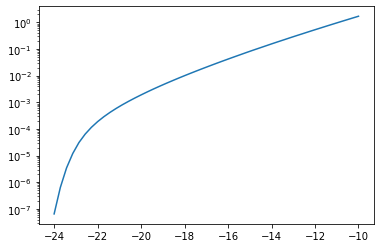

In [10]:
#teh shape of a normal LF for comparision
z = 6
MUV = np.linspace(-24, -10)
lf = pop.LuminosityFunction(z, MUV)

pl.figure(1)
pl.semilogy(MUV, lf)
pl.show()

# Loaded $ARES/input/hmf/hmf_ST_planck_TTTEEE_lowl_lowE_best_logM_1400_4-18_z_1201_0-60.hdf5.


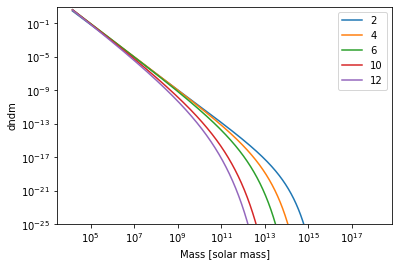

In [11]:
# mass function at a few redshifts
# The differential halo mass function, i.e., number of halos per mass bin, dn/dm. Note that the shape should be (len(z), ``len(M)).

for z in [2, 4, 6, 10, 12]:
    i = np.argmin(np.abs(z - pop_halo.halos.tab_z)) #Returns the indices of the min value (so with z-zArray, this min value corresponds to the value closest to z)

    pl.loglog(pop_halo.halos.tab_M, pop_halo.halos.tab_dndm[i, :], label=z)
    
pl.legend()
pl.ylabel('dndm')
pl.xlabel('Mass [solar mass]')
pl.ylim(1e-25, 10)
pl.show()

In [14]:
# g_per_msun -> solar mass in grams

#really the problem is mass to Mag

from ares.physics.Constants import g_per_msun, cm_per_mpc

def LF_linear(z, pop_halo, const):
    
#     const = 1e3
    c = const #* g_per_msun / 1000 #solar mass - so there are kg here - that seems bad - 
    #really we are multiplying by solar masses here, but there's no numerical conversion from that
#     print(c) #very very small
    
    i = np.argmin(np.abs(z - pop_halo.halos.tab_z))
    
    LF = c * pop_halo.halos.tab_dndm[i, :]
    
    return LF

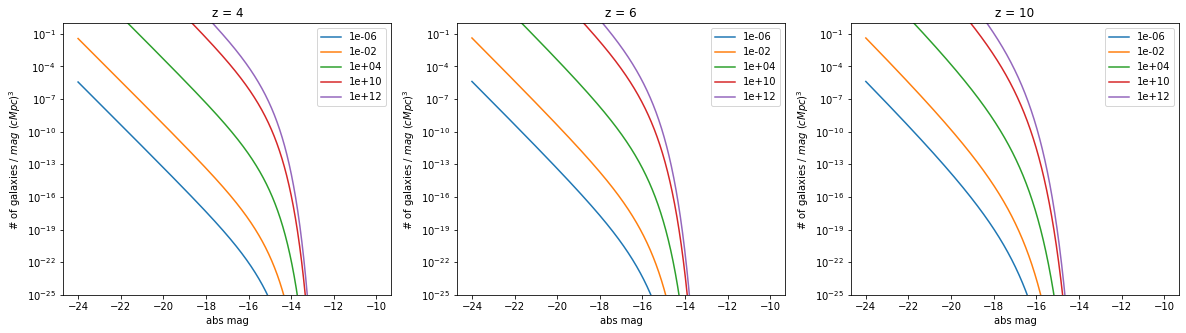

In [15]:
# mag = mass_to_mag(pop_halo.halos.tab_M)
z = 6

fig = pl.figure(figsize=(20, 5))

for i, z in enumerate([4, 6, 10]):
    pl.subplot(1, 3, i+1)

    for c in [1e-6, 1e-2, 1e4, 1e10, 1e12,]:
        lf = LF_linear(z, pop_halo, c)
        # print(lf)

        MUV = np.linspace(-24, -10, num=len(lf)) #do i just assume this and then the scaling just moves it - then I need to make sure lengths match
        #the problem with this is by changing the bounds of MUV the scaling will change

        pl.semilogy(MUV, lf, label='%.e' %c)
        pl.title("z = %i" %z)
    #     pl.semilogy(pop_halo.halos.tab_M*c, lf, label=c)


    # pl.loglog(pop_halo.halos.tab_M, lf, label=z)

    #but the x axis should be mag somehow???

    pl.legend()
    pl.ylabel('# of galaxies / $ mag~(cMpc)^3$')
    pl.xlabel('abs mag')
    pl.ylim(1e-25, 1)

# pl.figsize()
pl.show()

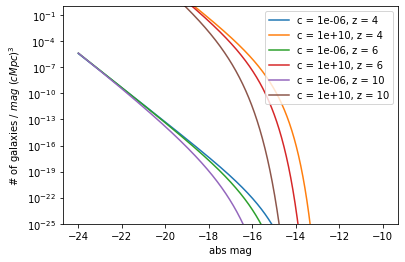

In [17]:
# For plotting a couple lines on the same plot for comparision

for i, z in enumerate([4, 6, 10]):

    for c in [1e-6, 1e10]:
        lf = LF_linear(z, pop_halo, c)
        MUV = np.linspace(-24, -10, num=len(lf)) #do i just assume this and then the scaling just moves it - then I need to make sure lengths match

        pl.semilogy(MUV, lf, label='c = %.e, z = %i' %(c, z))

    pl.legend()
    pl.ylabel('# of galaxies / $ mag~(cMpc)^3$')
    pl.xlabel('abs mag')
    pl.ylim(1e-25, 1)

pl.show()